# Actions
- generate heatmap for each of the DF's - White, Red, All together
- generate SVM models for each of the DF's predicting quality - White, Red, All
- normalize / regularization of the data
- PCA or refinement

https://scikit-learn.org/stable/modules/svm.html#multi-class-classification

Generate the scores to: https://scikit-learn.org/stable/modules/svm.html#scores-probabilities


Hyperparameter Tuning with Scikit
https://subscription.packtpub.com/book/data/9781789615326/10/ch10lvl1sec75/hyperparameter-tuning-with-grid-search

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html#sphx-glr-auto-examples-svm-plot-svm-nonlinear-py

## Try different kerne's
https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py


In [110]:
import os
import numpy as np
import pandas as pd


def load_data(data_path_red, data_path_white):
    column_header = ["fixed_acidity", "volatile_acidity", "citric_acid", \
                     "residual_sugar", "chlorides", "free_sulfur_dioxide", \
                     "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", "quality"]

    df_red = pd.read_csv(data_path_red, sep = ';', names = column_header, header=0)
    df_red['color'] = 1

    df_white = pd.read_csv(data_path_white, sep = ';', names = column_header, header=0)
    df_white['color'] = 0
    
    total_rows = len(df_white) + len(df_red)
    df_all = df_red.append(df_white)
    assert(len(df_all) == total_rows)

    return df_red, df_white, df_all
    
    

In [86]:

#load the wine
data_path_red = '../.data/wine/winequality-red.csv'
data_path_white = '../.data/wine/winequality-white.csv'


df_red, df_white, df_all = load_data(data_path_red, data_path_white)


In [87]:
# retrieve JUST the feature columns - excet the "color"
features_all = df_all.iloc[:, 0:11] #syntax is 'UP to but NOT (<) when a range.'
labels_all = df_all.iloc[:, 11]

In [88]:
from sklearn import svm

X = features_all
y = labels_all

# TODO: https://scikit-learn.org/stable/modules/svm.html#multi-class-classification

clf = svm.SVC(decision_function_shape='ovo')
#clf = svm.SVC()

model = clf.fit(X, y)

In [74]:
model.predict(X)

array([6, 6, 6, ..., 6, 6, 6])

In [97]:
df_red.iloc[ : , 10:12]

,alcohol,quality
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5
...,...,...
1594,10.5,5
1595,11.2,6
1596,11.0,6
1597,10.2,5


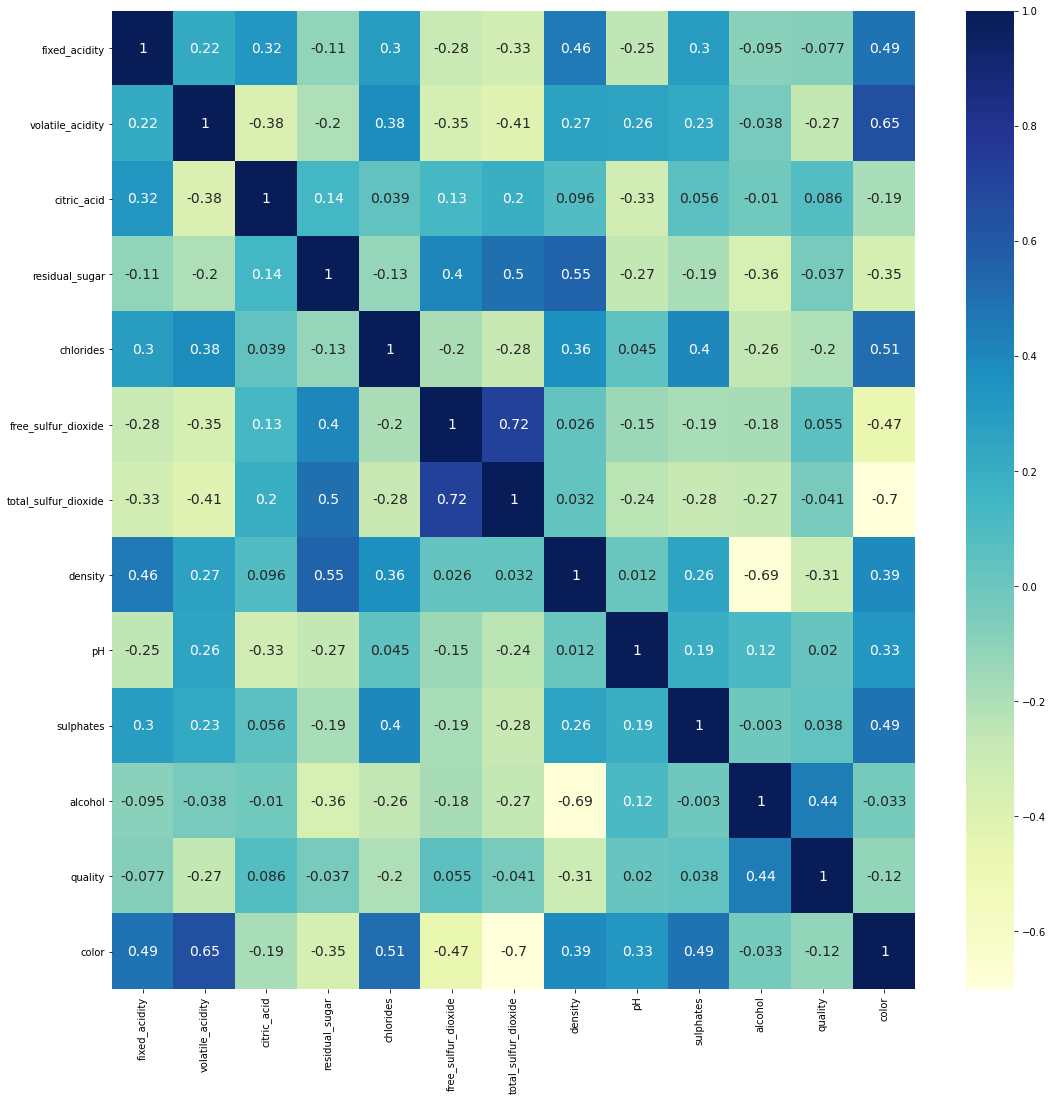

In [118]:
import matplotlib.pyplot as plt

import seaborn as sns

figsize = 18, 18

plt.figure(figsize = figsize)
rv = df_all.corr()
sns.heatmap(rv, annot = True, annot_kws = {"size": 14}, label = "foo", cmap = "YlGnBu") # Blues, Blues_r YlGnBu
plt.show()

In [ ]:
df_red.corr()

In [119]:
rv

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218
